- MSSV: 19120688
- Họ và tên: Đỗ Nhật Toàn

# Import các thư viện

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
data = pd.read_csv('./ToyotaCorolla.csv', header=0)
data = data.dropna()

In [ ]:
data.shape

In [ ]:
data.head()

# Hãy trực quan hóa các thông tin thống kê mô tả cho các biến

In [57]:
atr_list = ['Price', 'Age', 'Kilometers', 'Fuel_Type', 'HP', 'Metallic', 'Color', 'Automatic', 'CC', 'Doors', 'Quarterly_Tax', 'Weight']
numeric_list = ['Price', 'Age', 'HP', 'CC', 'Doors', 'Quarterly_Tax', 'Weight']
categorical_list = ['Fuel_Type', 'Metallic', 'Automatic', 'Color']

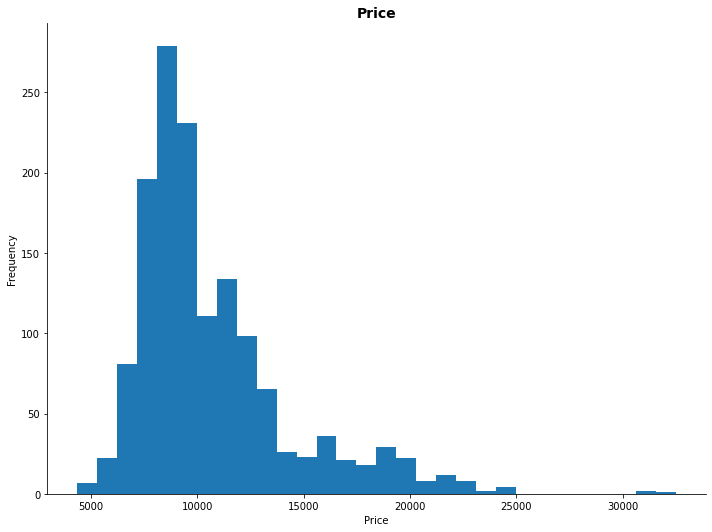

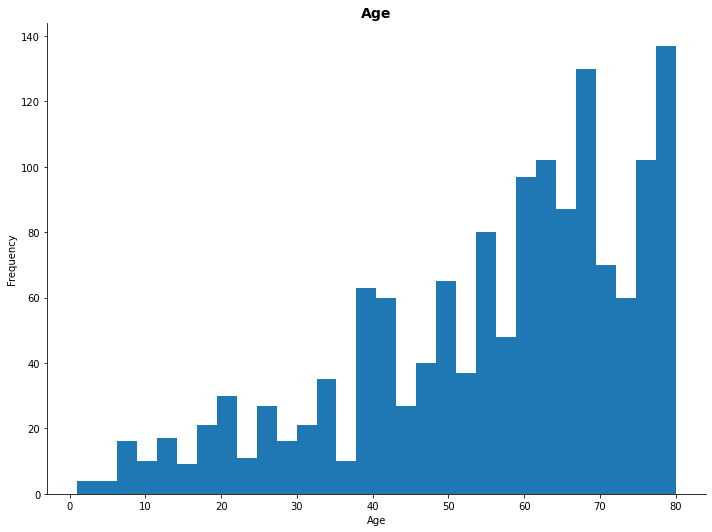

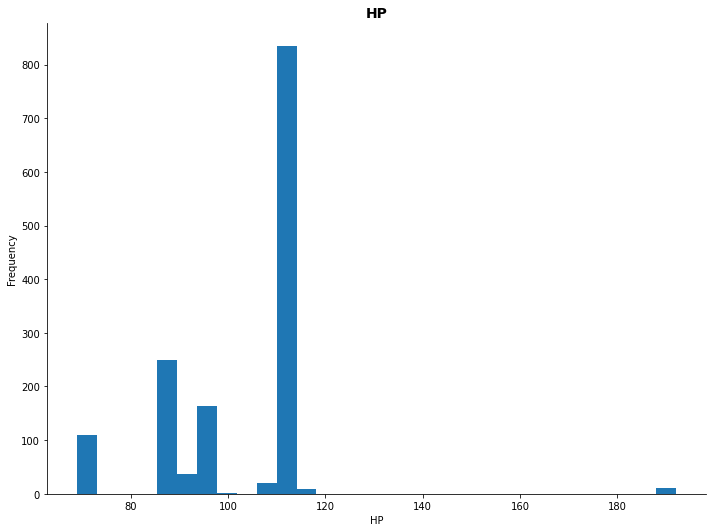

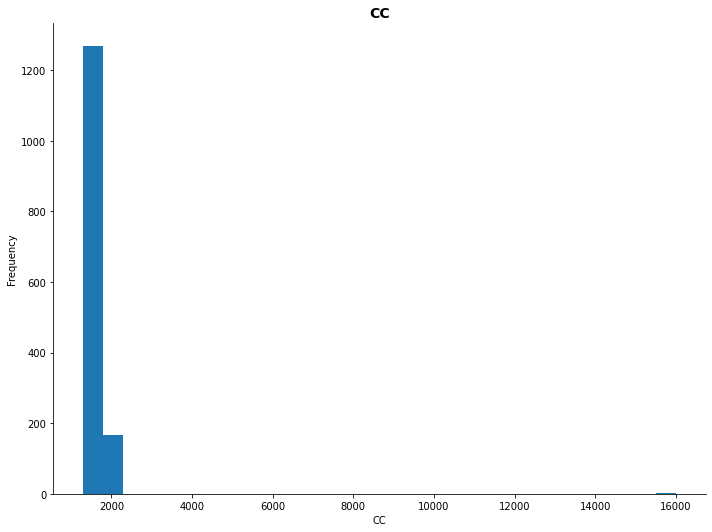

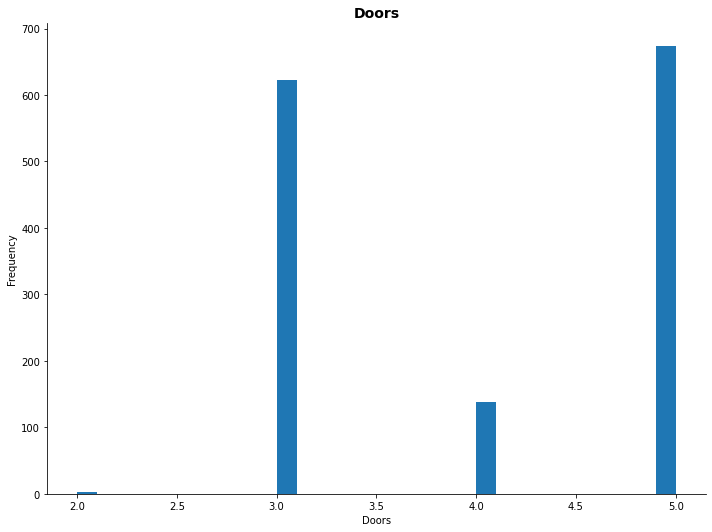

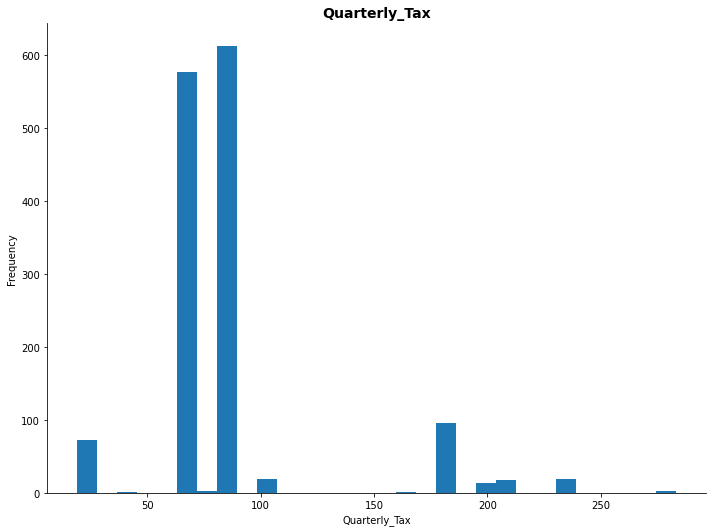

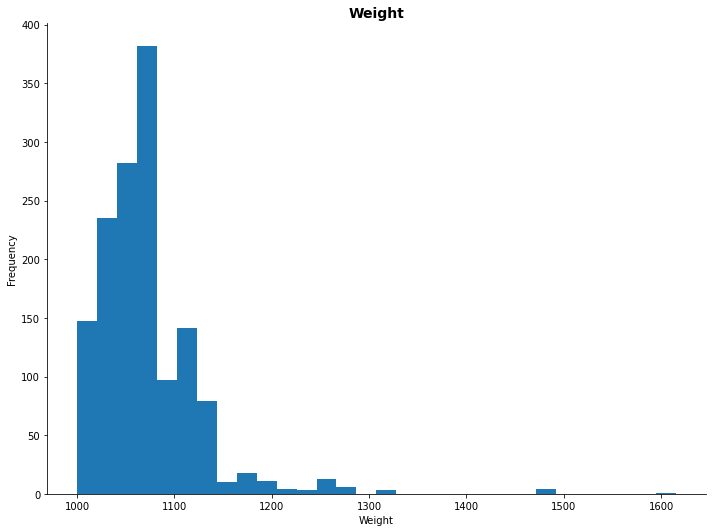

In [58]:

for x in numeric_list:
    fig_obj = plt.figure(figsize=(10, 7.5))
    ax = plt.subplot(111)
    ax.spines["bottom"].set_visible(True)  # Set the spines, or box bounds visibility
    ax.spines["left"].set_visible(True)    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ''' Plot the histogram of '''
    p = plt.hist(data[x], bins = 30)
    plt.title(x, fontsize=14, fontweight='bold')
    ''' Save figure '''
    plt.xlabel(x)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

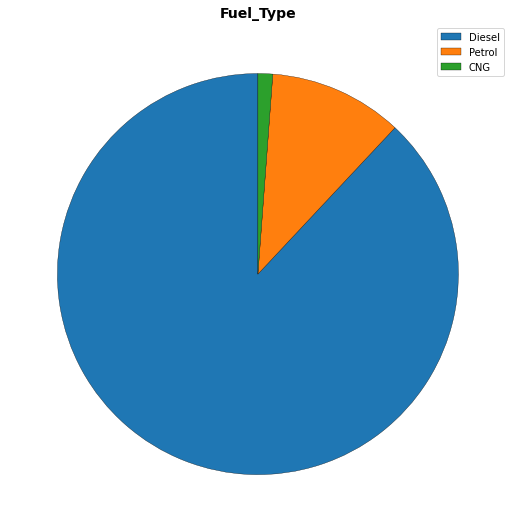

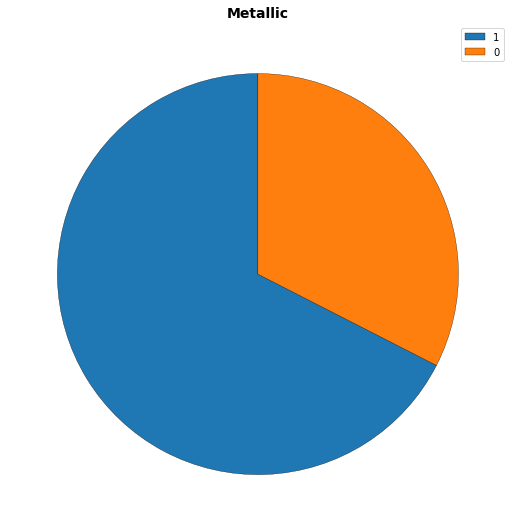

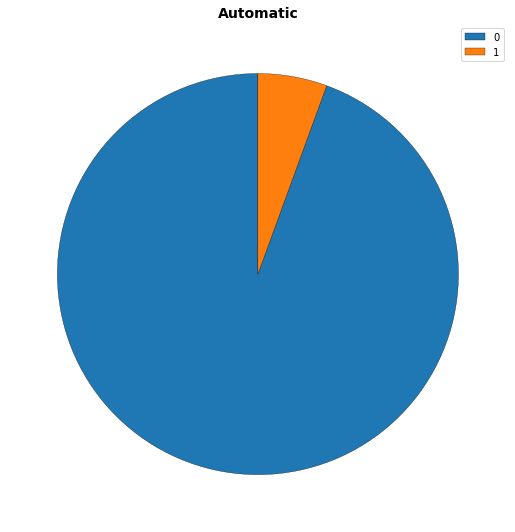

In [59]:
for x in categorical_list[:-1]:
    fig_obj = plt.figure(figsize=(10, 7.5))
    fig_obj.set_facecolor('white')
    value = data[x].value_counts()
    label = data[x].unique().tolist()
    ax = plt.subplot(111)
    plt.title(x, fontsize=14, fontweight='bold')
    plt.pie(value,  startangle=90, wedgeprops = {"edgecolor" : "black",
                        'linewidth': 0.3,
                        'antialiased': True})
    plt.legend(label,loc=1)
    plt.tight_layout()
    plt.show()

In [ ]:
fig_obj = plt.figure(figsize=(10, 7.5))
fig_obj.set_facecolor('white')
value = data['Color'].value_counts()
label = data['Color'].unique().tolist()
ax = plt.subplot(111)
plt.title('Color', fontsize=14, fontweight='bold')
plt.pie(value, colors=label, startangle=90, wedgeprops = {"edgecolor" : "black",
                      'linewidth': 0.3,
                      'antialiased': True})
plt.legend(label,loc=1)
plt.tight_layout()
plt.show()

In [ ]:
    # fig_obj = plt.figure(figsize=(10, 7.5))
    # ax = plt.subplot(111)
    # ax.spines["bottom"].set_visible(True)  # Set the spines, or box bounds visibility
    # ax.spines["left"].set_visible(True)    
    # ax.spines['right'].set_visible(False)
    # ax.spines['top'].set_visible(False)
    # ''' Plot the histogram of '''
    # p = plt.bar(data[x], bins = 40)
    # plt.title(x, fontsize=14, fontweight='bold')
    # ''' Save figure '''
    # plt.tight_layout()

# Tìm và trực quan mối quan hệ tương quan giữa các cặp biến (nếu có)

<AxesSubplot:>

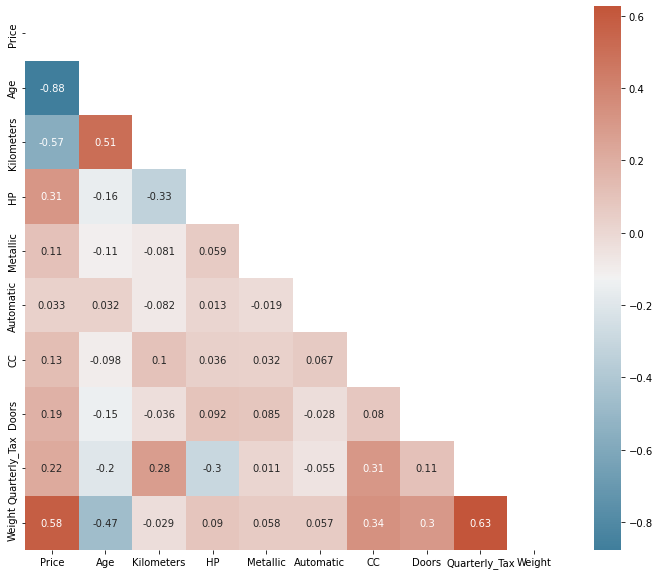

In [52]:
corr = data.corr(method="pearson")
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

## Weight vs. Quarterly_Tax

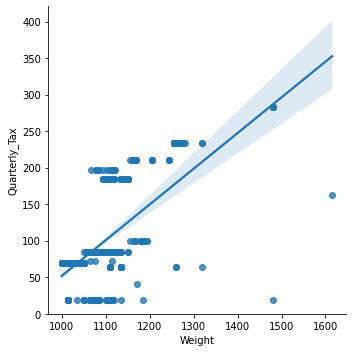

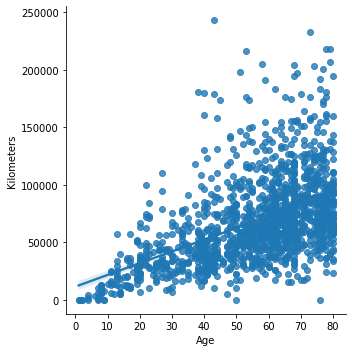

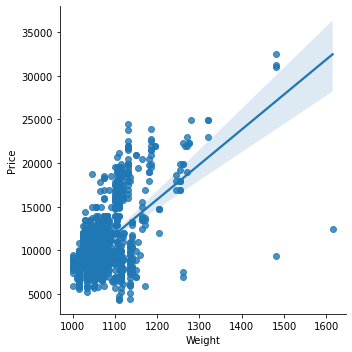

In [61]:
sns.lmplot(x="Weight",y="Quarterly_Tax", data=data, order=1)
sns.lmplot(x="Age",y="Kilometers", data=data, order=1)
sns.lmplot(x="Weight",y="Price", data=data, order=1)  

# Hãy trực quan hóa biểu đồ histogram cho `Price` theo từng biến biến theo `Fuel_type` và `Color`



In [ ]:
fig_obj = plt.figure(figsize=(10, 7.5))
ax = plt.subplot(111)
ax.spines["bottom"].set_visible(True)  # Set the spines, or box bounds visibility
ax.spines["left"].set_visible(True)    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
p = plt.hist(data.Price, bins = 19, color="red", edgecolor='black')
plt.title("Global active power", fontsize=14, fontweight='bold')
plt.xlabel("Global active power (kilowatts)")
plt.ylabel("Frequency")
plt.tight_layout()